# ДЗ 1

## Подключение библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

c:\Users\SilkSlime\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Расчет варианта

In [3]:
surname = "Панфилкин"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  3
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) (6 баллов)

### 1. Загрузка данных в датафрейм

In [4]:
# years - список годов, которые присутствуют в документе
years = [1996, 1998, 2000] + list(range(2002, 2022))
# col_names - список имен колонок для датафрейма
col_names = ["Country/Territory", "Code"] + [f"{name} {year}" for year in years for name in ["Estimate", "Rank"]]
# col_nums - список номеров колонок excel-файла, которые нужно считать (первые две колонки и каждую третью после до 140)
col_nums = [0, 1] + [i for i in range(2, 140, 3)]

# pd.read_excel - чтение данных из файла Excel
# sheet_name - имя листа, с которого нужно считать данные
# skiprows - количество строк сверху, которые нужно пропустить
# usecols - колонки, которые нужно считать
# names - имена колонок
wgidataset = pd.read_excel('data/wgidataset.xlsx', sheet_name='ControlofCorruption', skiprows=14, names=col_names, usecols=col_nums)
wgidataset

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Estimate 2017,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.287308,87.980766,1.247948,87.500000,1.213882,85.576920,1.232362,86.057693,0.834079,79.326920
1,Andorra,ADO,1.318143,87.096771,1.334759,89.304810,1.313404,88.297874,1.310744,87.830688,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,1.311401,88.461540,1.325617,88.942307
2,Afghanistan,AFG,-1.291705,4.301075,-1.176012,8.021390,-1.271724,4.787234,-1.251137,4.761905,...,-1.521726,3.846154,-1.489772,4.807693,-1.407710,6.250000,-1.480538,4.807693,-1.142377,12.500000
3,Angola,AGO,-1.167702,9.677420,-1.180451,7.486631,-1.197514,8.510638,-1.155493,7.936508,...,-1.428053,5.769231,-1.180501,11.057693,-1.078114,12.980769,-0.953371,18.269230,-0.655346,27.884615
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,0.675268,74.519234,0.680943,74.519234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,-0.412285,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693
210,South Africa,ZAF,0.732927,76.344086,0.638809,72.727272,0.550270,70.212769,0.332902,67.195770,...,-0.101496,53.846153,-0.112126,53.365383,0.020065,57.211540,-0.010780,56.250000,0.022103,55.769230
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.000000,-1.416679,1.069519,-1.459175,0.531915,-1.449971,1.058201,...,-1.428617,5.288462,-1.500561,3.846154,-1.539866,3.365385,-1.574677,2.403846,-1.552154,4.326923
212,Zambia,ZMB,-0.840641,24.731182,-0.853156,26.737968,-0.818261,26.595745,-0.758519,29.629629,...,-0.545036,35.096153,-0.657134,28.365385,-0.662320,27.884615,-0.723668,26.442308,-0.753424,25.480770


### 2. Cортировка данных по убыванию индекса dataframe

In [5]:
# sort wgidataset by df index
wgidataset.sort_index(ascending=False, inplace=True)
wgidataset

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Estimate 2017,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021
213,Zimbabwe,ZWE,-0.278847,47.849461,-0.504802,37.433155,-1.127275,10.638298,-1.156760,7.407407,...,-1.281081,9.615385,-1.227581,10.096154,-1.273280,10.096154,-1.289440,9.615385,-1.257897,8.653846
212,Zambia,ZMB,-0.840641,24.731182,-0.853156,26.737968,-0.818261,26.595745,-0.758519,29.629629,...,-0.545036,35.096153,-0.657134,28.365385,-0.662320,27.884615,-0.723668,26.442308,-0.753424,25.480770
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.000000,-1.416679,1.069519,-1.459175,0.531915,-1.449971,1.058201,...,-1.428617,5.288462,-1.500561,3.846154,-1.539866,3.365385,-1.574677,2.403846,-1.552154,4.326923
210,South Africa,ZAF,0.732927,76.344086,0.638809,72.727272,0.550270,70.212769,0.332902,67.195770,...,-0.101496,53.846153,-0.112126,53.365383,0.020065,57.211540,-0.010780,56.250000,0.022103,55.769230
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,-0.412285,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,0.675268,74.519234,0.680943,74.519234
3,Angola,AGO,-1.167702,9.677420,-1.180451,7.486631,-1.197514,8.510638,-1.155493,7.936508,...,-1.428053,5.769231,-1.180501,11.057693,-1.078114,12.980769,-0.953371,18.269230,-0.655346,27.884615
2,Afghanistan,AFG,-1.291705,4.301075,-1.176012,8.021390,-1.271724,4.787234,-1.251137,4.761905,...,-1.521726,3.846154,-1.489772,4.807693,-1.407710,6.250000,-1.480538,4.807693,-1.142377,12.500000
1,Andorra,ADO,1.318143,87.096771,1.334759,89.304810,1.313404,88.297874,1.310744,87.830688,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,1.311401,88.461540,1.325617,88.942307


### 3. Отображение данных по индексу WGI за 2021 год в виде горизонтального столбчатого графика (rank)

#### Подготовка датафрейма

In [6]:
# создание нового датафрейма, в котором будут только данные по 2021 году
wgidataset_2021 = wgidataset[["Country/Territory", "Rank 2021"]].copy()
# удаление строк с пропущенными значениями
wgidataset_2021.dropna(inplace=True)
# сортировка по возрастанию Rank 2021
wgidataset_2021.sort_values(by="Rank 2021", inplace=True)
# unique_ranks - массив уникальных значений столбца 'Rank' в порядке убывания
unique_ranks = wgidataset_2021['Rank 2021'].unique()[::-1]
# get_label_with_rank_from_row - функция, которая принимает строку датафрейма и возвращает строку вида "1. Россия"
# тут используется функция np.where, которая возвращает индексы элементов, удовлетворяющих условию
# в данном случае это индексы элементов, равных row['Rank']
# затем мы берем первый элемент этого массива, т.к. np.where всегда возвращает массив
# и прибавляем 1, т.к. нумерация должна начинаться с 1
get_label_with_rank_from_row = lambda row: f"{np.where(row['Rank 2021'] == unique_ranks)[0][0]+1}. {row['Country/Territory']}"
# добавляем новый столбец 'Label With Rank' в датафрейм, в котором будут строки вида "1. Россия"
wgidataset_2021['Label With Rank'] = wgidataset_2021.apply(get_label_with_rank_from_row, axis=1)
wgidataset_2021

,Country/Territory,Rank 2021,Label With Rank
32,South Sudan,0.000000,202. South Sudan
182,Syrian Arab Republic,0.480769,201. Syrian Arab Republic
174,Somalia,0.961538,200. Somalia
208,"Yemen, Rep.",1.442308,"199. Yemen, Rep."
202,"Venezuela, RB",1.923077,"198. Venezuela, RB"
...,...,...,...
144,Norway,98.076920,5. Norway
169,Singapore,98.557693,4. Singapore
147,New Zealand,99.038460,3. New Zealand
63,Finland,99.519234,2. Finland


#### Отрисовка графика

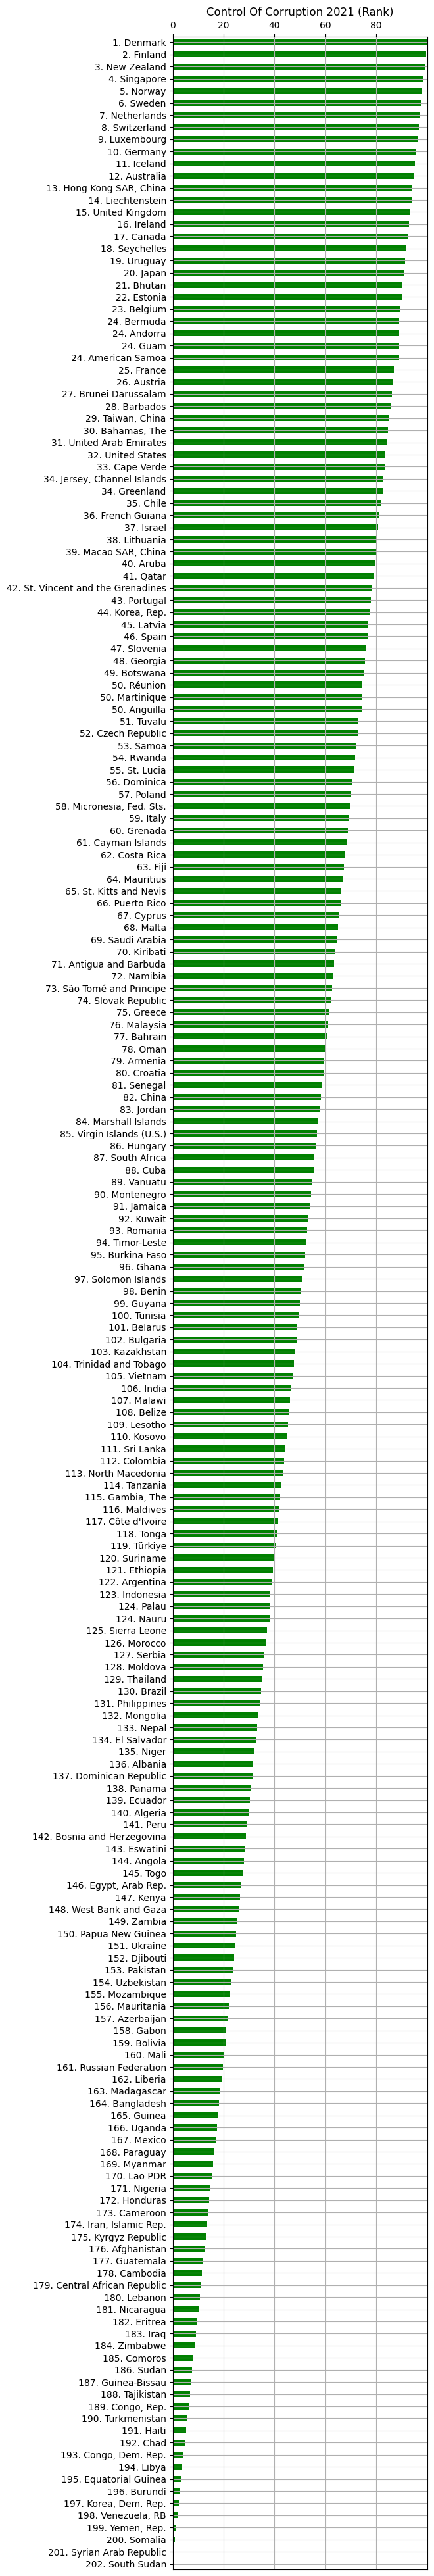

In [7]:
# plt.subplots - создание фигуры и осей для графика (fig - фигура, ax - оси)
fig, ax = plt.subplots(figsize=(5, 50))

# barh - создание горизонтальной гистограммы
# wgidataset['Label With Rank'] - массив значений для оси x
# wgidataset['Rank'] - массив значений для оси y
# color - цвет гистограммы
# height - высота столбцов гистограммы
ax.barh(
    wgidataset_2021['Label With Rank'],
    wgidataset_2021['Rank 2021'],
    color='green',
    height=0.5
)
# set_title - установка названия графика
ax.set_title('Control Of Corruption 2021 (Rank)')
# grid - отображение сетки
ax.grid(visible=True)
# margins - установка отступов для осей
ax.margins(0.001)
# set_xticks - установка значений для оси x (в данном случае от 0 до 80 с шагом 20)
ax.set_xticks(np.arange(0, 81, 20))
# xaxis.tick_top - отображение оси x сверху
ax.xaxis.tick_top()




### 4. Формирование DataFrame из исходного для региона в соответствии с моим вариантом (Вариант 3 - Europe and Central Asia - ECA)


In [8]:
# Загрузка данных о странах, их кодах и регионах в датафрейм из файла Excel (regions.xlsx)
regions_df = pd.read_excel('data/regions.xlsx')
region = 'ECA'

# формирование датафрейма из wgidataset, в котором будут только данные где Region == 'ECA'
# regions_df[regions_df['Region'] == region] - фильтрация датафрейма regions_df по региону
# regions_df[regions_df['Region'] == region]['Code'] - получение столбца 'Code' из датафрейма regions_df
# wgidataset['Code'].isin(regions_df[regions_df['Region'] == region]['Code']) - получение массива булевых значений,
# где True - если код страны есть в массиве кодов стран региона
wgidataset_ECA_region = wgidataset[wgidataset['Code'].isin(regions_df[regions_df['Region'] == region]['Code'])].copy()

### 5. Вывод данных DataFrame


In [9]:
# Вывод данных датафрейма wgidataset_ECA_region
wgidataset_ECA_region

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Estimate 2017,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,-0.412285,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693
200,Uzbekistan,UZB,-1.128821,12.903226,-1.134654,11.229946,-1.080415,12.234042,-0.964739,19.576719,...,-1.167382,12.019231,-1.059244,12.980769,-1.026222,15.384615,-1.050369,15.865385,-0.808077,23.076923
197,Ukraine,UKR,-1.110137,13.440860,-1.258210,4.278075,-1.110609,11.170213,-1.091394,9.523809,...,-0.810839,21.153847,-0.901347,17.788462,-0.780903,25.000000,-0.811725,23.076923,-0.766657,24.519230
192,Türkiye,TUR,-0.148074,51.612904,-0.354078,45.454544,-0.258080,46.808510,-0.570129,34.920635,...,-0.183095,49.519230,-0.327102,44.230770,-0.302947,43.750000,-0.338743,43.269230,-0.385957,40.384617
187,Turkmenistan,TKM,-1.021493,15.591398,-1.068734,15.508021,-1.077138,12.765958,-1.054273,11.111111,...,-1.348997,7.692307,-1.362379,7.692307,-1.376065,7.692307,-1.413870,6.250000,-1.419503,5.769231
186,Tajikistan,TJK,-1.273033,5.913979,-1.252361,4.812834,-1.265868,5.319149,-1.174971,6.878307,...,-1.328738,8.173077,-1.409969,6.730769,-1.330042,9.134615,-1.327856,7.692307,-1.338215,6.730769
163,Russian Federation,RUS,-1.053342,15.053763,-0.954374,21.390375,-0.943414,20.212767,-0.954848,20.634920,...,-0.893895,17.307692,-0.848471,20.192308,-0.802163,24.038462,-0.909426,19.230770,-0.900474,19.711538
131,Montenegro,MNE,NaN,NaN,0.497083,68.983955,-0.177506,51.595745,-0.156704,51.851852,...,-0.055764,55.288460,0.012018,57.692307,-0.004423,55.769230,-0.018825,55.769230,-0.019546,54.326923
126,North Macedonia,MKD,-0.613846,32.258064,-0.636420,34.224598,-0.638976,33.510639,-0.826058,25.396826,...,-0.301944,45.192307,-0.367773,42.788460,-0.434369,37.980770,-0.471356,34.615383,-0.351957,43.269230
121,Moldova,MDA,-0.437427,39.784946,-0.399806,42.780750,-0.623196,34.574467,-0.980350,17.989418,...,-0.803161,21.634615,-0.725502,25.961538,-0.623985,30.288462,-0.549642,32.211540,-0.447891,35.576923


### 6. Построение графиков индекса WGI за 1996-2021 для стран своего региона (Еstimate)

#### Подготовка датафрейма для графика

In [10]:
wgidataset_ECA_region_estimates = wgidataset_ECA_region.copy()
# drop all columns that contain 'Rank' in name
wgidataset_ECA_region_estimates.drop(columns=[col for col in wgidataset_ECA_region_estimates.columns if 'Rank' in col], inplace=True)
# rename columns 'Estimate YYYY' using dict comprehension and split
wgidataset_ECA_region_estimates.rename(columns={col: col.split(' ')[1] for col in wgidataset_ECA_region_estimates.columns if 'Estimate' in col}, inplace=True)
wgidataset_ECA_region_estimates

,Country/Territory,Code,1996,1998,2000,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
209,Serbia,SRB,-1.140072,-1.195605,-1.156671,-0.895785,-0.494189,-0.493294,-0.406051,-0.277591,...,-0.357433,-0.327526,-0.247089,-0.293314,-0.359122,-0.412285,-0.373657,-0.428668,-0.429459,-0.437255
200,Uzbekistan,UZB,-1.128821,-1.134654,-1.080415,-0.964739,-0.914872,-1.068812,-1.229638,-1.016336,...,-1.310680,-1.273043,-1.194444,-1.270281,-1.181306,-1.167382,-1.059244,-1.026222,-1.050369,-0.808077
197,Ukraine,UKR,-1.110137,-1.258210,-1.110609,-1.091394,-0.966655,-0.979342,-0.740643,-0.772782,...,-1.117539,-1.176262,-1.024342,-1.018160,-0.847186,-0.810839,-0.901347,-0.780903,-0.811725,-0.766657
192,Türkiye,TUR,-0.148074,-0.354078,-0.258080,-0.570129,-0.209118,-0.191904,-0.035273,0.026675,...,0.161345,0.091790,-0.134038,-0.135501,-0.174212,-0.183095,-0.327102,-0.302947,-0.338743,-0.385957
187,Turkmenistan,TKM,-1.021493,-1.068734,-1.077138,-1.054273,-1.015132,-1.270521,-1.347762,-1.399204,...,-1.314690,-1.285362,-1.177111,-1.204197,-1.376829,-1.348997,-1.362379,-1.376065,-1.413870,-1.419503
186,Tajikistan,TJK,-1.273033,-1.252361,-1.265868,-1.174971,-1.147746,-1.319210,-1.176047,-1.042832,...,-1.280342,-1.287331,-1.132050,-1.123586,-1.148092,-1.328738,-1.409969,-1.330042,-1.327856,-1.338215
163,Russian Federation,RUS,-1.053342,-0.954374,-0.943414,-0.954848,-0.783092,-0.825626,-0.847121,-0.940848,...,-1.051572,-1.020387,-0.918525,-0.952243,-0.817593,-0.893895,-0.848471,-0.802163,-0.909426,-0.900474
131,Montenegro,MNE,NaN,0.497083,-0.177506,-0.156704,-0.411994,-0.467465,-0.354254,-0.383751,...,-0.129764,-0.286886,-0.075149,-0.094629,-0.053474,-0.055764,0.012018,-0.004423,-0.018825,-0.019546
126,North Macedonia,MKD,-0.613846,-0.636420,-0.638976,-0.826058,-0.651164,-0.554222,-0.488401,-0.403455,...,-0.051175,-0.056260,-0.032469,-0.238547,-0.272066,-0.301944,-0.367773,-0.434369,-0.471356,-0.351957
121,Moldova,MDA,-0.437427,-0.399806,-0.623196,-0.980350,-0.884173,-1.039576,-0.672626,-0.643212,...,-0.614259,-0.752407,-0.852724,-0.915586,-0.956894,-0.803161,-0.725502,-0.623985,-0.549642,-0.447891


#### Отрисовка графика

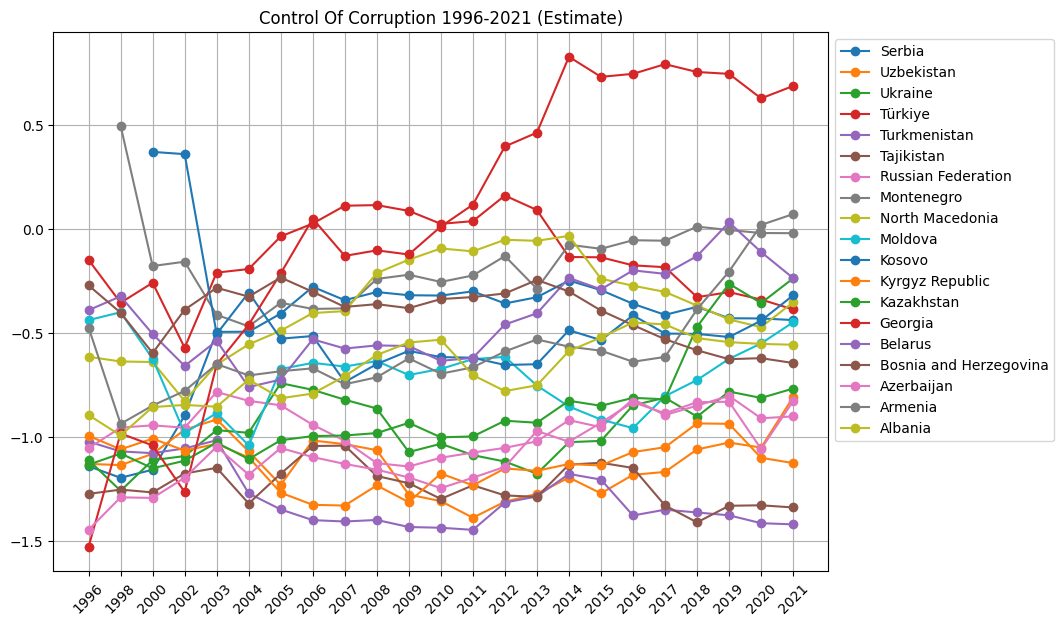

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

# iterate over all rows in the dataframe and plot the data points with dots
for index, row in wgidataset_ECA_region_estimates.iterrows():
    ax.plot(row[2:], marker='o', linestyle='-', label=row['Country/Territory'])

ax.set_title('Control Of Corruption 1996-2021 (Estimate)')
ax.grid(visible=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', labelrotation=45)

### 7. Нахождение стран с наибольшим и наименьшим значением WGI моего варианта региона (ECA) за 2021 год (estimate)
_⚠️Замечание. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса_

### 8. Определение среднего значения за каждый год в период с 1996 по 2021 (estimate)

### 9. Построение графикоа индекса WGI за 1996-2021 для стран моего региона и выделение страны с наибольшим и наименьшим значением WGI за 2021 год, а также отображение среднего значения по региону и РФ

### 11. Определение, как изменилось значение показателя в соответствии с моим вариантом (Вариант 1 - На сколько позиций в рейтинге c 1996 по 2021) с 1996 по 2021 (rank)
_⚠️Замечание. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса_

### 12. Вывод таблицы для моего варианта (WGI - rank)

### 13. Отображение диаграммы размаха (boxplot) индекса WGI для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

## Задание 2. Анализ рынка акций (4 балла)

### 1. Загрузка данных в один dataframe из всех файлов в директории /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а указаны значения столбца "Date". Название столбцов соответствуют названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)
_⚠️Замечание. Нужна только цена закрытия_

In [104]:
from pathlib import Path
# Я использую библиотеку pathlib для работы с путями к файлам (моя любимая библиотека)
stock_dir = Path('data/stock')
# Создание датафрейма из файлов в папке stock_dir
# .glob('*.csv') - получение списка файлов с расширением .csv в папке stock_dir
# pd.read_csv(file, usecols=['Date', 'Close'], index_col='Date', parse_dates=True) - чтение файла csv
# usecols=['Date', 'Close'] - использовать только столбцы 'Date' и 'Close'
# index_col='Date' - использовать столбец 'Date' как индекс
# parse_dates=True - парсить даты
# rename(columns={'Close': file.stem}) - переименовать столбец 'Close' в название файла без расширения
# axis=1 - объединить датафреймы по столбцам
stock_df = pd.concat(
    [
        # set Day as first day of the month
        pd.read_csv(filepath, usecols=['Date', 'Close'], index_col='Date', parse_dates=True).rename(columns={'Close': filepath.stem})
        for filepath
        in stock_dir.glob('*.csv')
    ],
    axis=1
)
stock_df


,ADBE,ADSK,AKAM,BABA,BIDU,CA,CHKP,CRM,CTSH,EBAY,...,INTU,MSFT,NTES,NVDA,PYPL,RHT,SAP,TWTR,VMW,YHOO
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-02,73.940002,58.639999,71.050003,83.239998,NaN,32.610001,81.970001,66.809998,62.389999,57.680000,...,96.959999,40.660000,105.300003,20.930000,NaN,75.750000,72.169998,50.080002,82.010002,44.439999
2015-04-01,76.059998,56.830002,73.779999,81.290001,NaN,31.770000,83.480003,72.820000,58.540001,58.259998,...,100.330002,48.639999,128.190002,22.200001,NaN,75.260002,75.690002,38.959999,88.099998,42.570000
2015-05-01,79.089996,54.150002,76.269997,89.320000,NaN,30.450001,84.720001,72.750000,64.720001,61.359997,...,104.150002,46.860001,141.410004,22.129999,NaN,77.269997,73.900002,36.669998,87.320000,42.939999
2015-06-01,81.010002,50.080002,69.820000,82.269997,NaN,29.290001,79.550003,69.629997,61.090000,60.239998,...,100.769997,44.150002,144.869995,20.110001,NaN,75.930000,70.230003,36.220001,85.739998,39.290001
2015-07-01,81.989998,50.580002,76.709999,78.339996,NaN,29.139999,80.769997,73.300003,63.099998,28.120001,...,105.769997,46.700001,138.630005,19.950001,NaN,79.080002,71.669998,31.010000,89.129997,36.669998
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.700001,NaN,NaN,NaN,NaN,NaN
2015-08-03,78.570000,46.750000,71.309998,66.120003,NaN,27.290001,78.010002,69.360001,62.939999,27.110001,...,85.750000,43.520000,111.180000,22.480000,35.000000,72.209999,67.260002,27.790001,79.150002,32.240002
2015-09-01,82.220001,44.139999,69.059998,58.970001,NaN,27.299999,79.330002,69.430000,62.610001,24.440001,...,88.750000,44.259998,120.120003,24.650000,31.040001,71.879997,64.790001,26.940001,78.790001,28.910000
2015-10-01,88.660004,55.189999,60.820000,83.830002,NaN,27.709999,84.940002,77.709999,68.110001,27.900000,...,97.430000,52.639999,144.529999,28.370001,36.009998,79.110001,78.709999,28.459999,60.150002,35.619999


### 2. Расчет корреляционной матрицы для всех акций

In [135]:
# .corr() - вычисление корреляции для каждой пары столбцов датафрейма (по умолчанию используется коэффициент Пирсона)
corr_matrix = stock_df.corr()
corr_matrix

# Это я для поиграться с красотой графика
# corr_matrix = corr_matrix.reindex(corr_matrix.sum().sort_values(ascending=False).index, axis=0).reindex(corr_matrix.sum().sort_values(ascending=False).index, axis=1)

### 3. Отображение корреляционной матрицы в виде диаграммы.

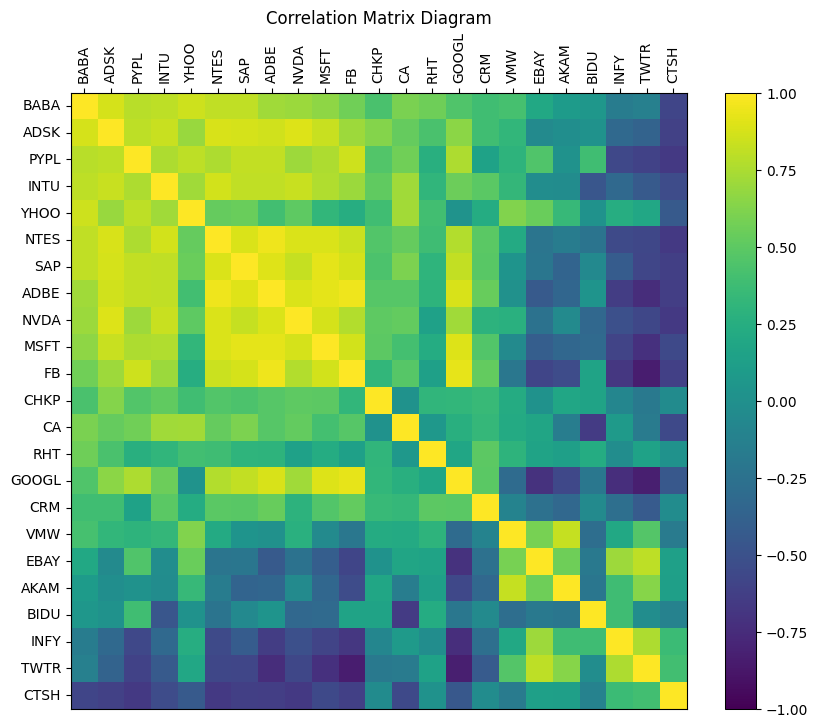

In [164]:
fig, ax = plt.subplots(figsize=(10, 8))
# set_title - установка названия графика
ax.set_title('Correlation Matrix Diagram')
# использую библиотеку seaborn для отображения корреляционной матрицы в виде тепловой карты
# можно использовать matplotlib (plt.matshow - отображение матрицы в виде изображения)
# sns.heatmap - отображение корреляционной матрицы в виде тепловой карты
# vmin - минимальное значение для цветовой шкалы
# vmax - максимальное значение для цветовой шкалы
# annot - отображение значений в ячейках
# cmap - цветовая схема
# ax - объект Axes, на котором будет отображаться график
# square - отображение ячеек в виде квадратов
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, cmap='viridis', ax=ax, square=True)
# отображение оси x сверху
ax.xaxis.tick_top()
# поворот подписей оси x на 90 градусов
ax.tick_params(axis='x', labelrotation=90)
# отображение границ для всех сторон
for spine in ax.spines.values():
    spine.set_visible(True)
# получение объекта Colorbar
cbar = ax.collections[0].colorbar
# добавление границы для Colorbar
cbar.outline.set_linewidth(0.75)

### 4. В соответствии с моим вариантом (Вариант 1 - Microsoft (MSFT)) определите:
* акцию с максимальной положительной корреляцией (max)
* акцию с максимальной отрицательной корреляцией (min)
* акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

In [165]:
# Целевая компания
target_company = 'MSFT'
# Получение отсортированного списка корреляций с целевой компанией, без учета самой целевой компании
corr_with_msft = corr_matrix[target_company].sort_values(ascending=False)[1:]
# Максимальная корреляция
max_corr_company = corr_with_msft.index[1]
# Максимальная отрицательная корреляция
min_corr_company = corr_with_msft.index[-1]
# Компания с корелляцией близкой к нулю
no_corr_company = corr_with_msft[corr_with_msft.abs() == corr_with_msft.abs().min()].index[0]

print(f'Компания с максимальной корреляцией с Microsoft               : {max_corr_company:4} ({corr_with_msft[max_corr_company]:.2f})')
print(f'Компания с максимальной отрицательной корреляцией с Microsoft : {min_corr_company:4} ({corr_with_msft[min_corr_company]:.2f})')
print(f'Компания, корелляция которой с Microsoft близка к нулю        : {no_corr_company:4} ({corr_with_msft[no_corr_company]:.2f})')


Компания с максимальной корреляцией с Microsoft               : ADBE (0.92)
Компания с максимальной отрицательной корреляцией с Microsoft : TWTR (-0.72)
Компания, корелляция которой с Microsoft близка к нулю        : VMW  (-0.05)


### 5. Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)

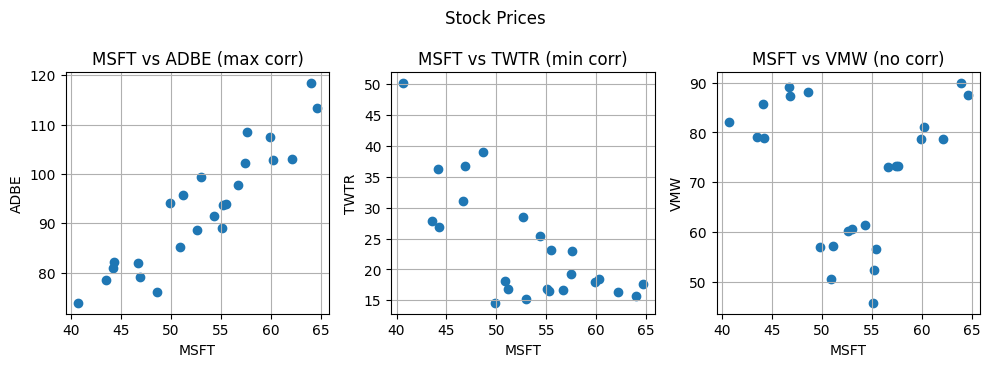

In [187]:
companies = [target_company, max_corr_company, min_corr_company, no_corr_company]
labels = ['MSFT (target)', 'ADBE (max corr)', 'TWTR (min corr)', 'VMW (no corr)']

# Три графика в одной строке
fig, ax = plt.subplots(1, 3, figsize=(10, 3.7))
# set_title - установка названия графика
fig.suptitle('Stock Prices')
# Перебор требуемых компаний
for i, company in enumerate(companies[1:]):
    # scatter - отображение точечного графика
    # label - подпись для легенды
    ax[i].scatter(stock_df[target_company], stock_df[company], label=f'{target_company} vs {company}')
    # legend - отображение легенды
    ax[i].set_title(f'{target_company} vs {labels[i+1]}')
    # set_xlabel - установка подписи оси x
    ax[i].set_xlabel(target_company)
    # set_ylabel - установка подписи оси y
    ax[i].set_ylabel(company)
    # grid - отображение сетки
    ax[i].grid(visible=True)
# tight_layout - автоматическое выравнивание графиков
fig.tight_layout()



### 6. Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [188]:
# Вычисление средней цены акций для каждого месяца
# resample('MS') - ресемплирование по месяцам (MS - Month Start)
# first() - выбор первого значения в каждом месяце
# mean(axis=1) - вычисление среднего значения по строкам
average_stock_price = stock_df.resample('MS').first().mean(axis=1)
average_stock_price


Date
2015-03-01     88.030001
2015-04-01     89.109049
2015-05-01     90.564762
2015-06-01     87.711903
2015-07-01     90.353636
2015-08-01     84.474546
2015-09-01     83.863182
2015-10-01     94.246365
2015-11-01     97.221363
2015-12-01     97.331364
2016-01-01     91.659999
2016-02-01     88.829090
2016-03-01     99.561306
2016-04-01     96.432609
2016-05-01    101.787825
2016-06-01     98.156523
2016-07-01    105.233915
2016-08-01    107.825217
2016-09-01    111.394783
2016-10-01    112.875653
2016-11-01    109.284782
2016-12-01    109.423044
2017-01-01    117.401739
2017-02-01    122.210869
Freq: MS, dtype: float64

### 7. Постройте графики для акций из пункта 4 и средней из пункта 6. Примерный вид графика приведен ниже

Text(0, 0.5, 'Stock Price ($)')

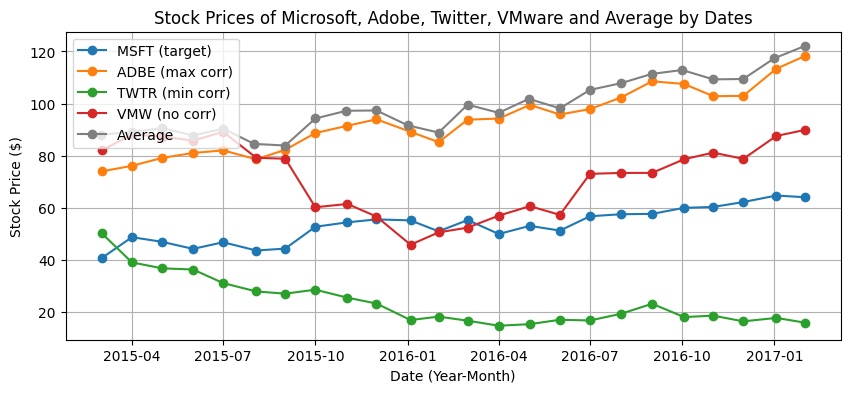

In [190]:
# создание объекта Figure и Axes
fig, ax = plt.subplots(figsize=(10, 4))
# установка названия графика
ax.set_title('Stock Prices of Microsoft, Adobe, Twitter, VMware and Average by Dates')
# Перебор компаний и подписей для легенды
for company, label in zip(companies, labels):
    # отображение линейного графика с маркерами
    ax.plot(stock_df[company].dropna(), label=label, marker='o', linestyle='-')
# отображение линейного графика средней цены акций серым цветом
ax.plot(average_stock_price, label='Average', marker='o', linestyle='-', color='gray')
# отображение легенды слева сверху внутри графика
ax.legend(loc='upper left')
# отображение сетки
ax.grid(visible=True)
# подписи к осям
ax.set_xlabel('Date (Year-Month)')
ax.set_ylabel('Stock Price ($)')


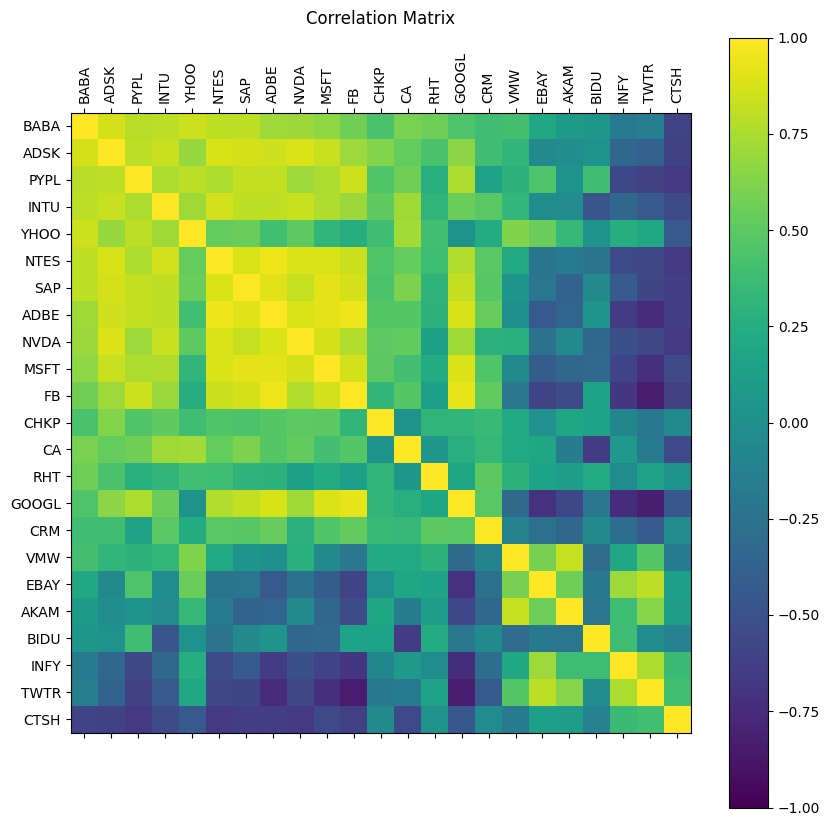

In [159]:
figure = plt.figure("4", figsize=[10, 10]) 
ax = plt.subplot(1,1,1) # 1 строка, 1 столбец, 1 номер
plt.title("Correlation Matrix", pad = 20) # название графика,
 # pad = 20 -- указываем пространство между графиком и названием
# Отобразим матрицу с использованием matshow
caxes = ax.matshow(corr_matrix, vmin = -1, vmax = 1)
# Добавим colorbar по аналогии с примером графика
figure.colorbar(caxes) # shrink = 0.82 -- соотношение масштаба длины colorbar-а относительно
 # основного графика (т.е. 82%)
# (взято на глаз из эстетических соображений)
# Сформируем отметку tick для каждой акции по обеим осям
ticks = range(len(corr_matrix))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation="vertical")
ax.set_yticklabels(corr_matrix.columns)
plt.show()